# A Study of Random Walks in probability theory

$\textbf {Abstract.}$: A range of natural phenomena such as the movement of molecules in liquids and gases, the ﬂuctuation of stock prices and interest rates in fnancial markets, games of chance in a casino are modelled by repeated coin ﬂippings
$\textit{aka}$ $\textbf{the simple random walk}$ - a sequence of random variables ${S_0, S_1, \ldots, S_n}$. We prove several interesting properties analytically followed by a numerical simulation. Upon investigation, we reach conclusions that play havoc with intuition. In a prolonged series of coin tossings, it is expected we stay positive about half the time, and in red the other half. This is entirely wrong, however. Several conclusions are drawn from the arc sine law. The paper is divided into the following sections -

1. A random walk on the integer lattice
2. Ballot Theorem Simulation
3. Proof of ballot theorem by Reflection Principle
4. Studying and simulating the reformulation of the combinatorial theorems
5. Studying and simulating the Arc Sine law


## A one-dimensional random walk

An elementary example of a random walk is the random walk on an integer line. The walk can be illustrated as follows.

A fair coin is tossed $N$ times, where $N$ is a large number. Each coin toss is random and may result in a heads($H$) with probability $p=1/2$ and tail($T$) with the probability $q=1/2$. Let $\epsilon_k$ be the outcome of the $k$-th tossing. 

$$ \epsilon_k = \left.
  \begin{cases}
    +1, & \text{if the k-th toss results in } H \\
    -1, & \text{if the k-th toss results in } T \\
  \end{cases}
  \right\}$$

Each $\epsilon_k$ is a Bernoulli(1/2) random variable. Each trial is independent of the others. 

Define 

$$\begin{align}
s_{k}&=\epsilon_{1}+\epsilon_{2}+\ldots+\epsilon_{k}\\
     &=\sum_{i=1}^{k}\epsilon_{i}
\end{align}$$

Let $HHHTT$ be an arbitrary sequence of coin tosses of length $N=5$. In this example, $\{s_{1}=1,s_{2}=2,s_{3}=3,s_{4}=2,s_{5}=1\}$. Intuitively, $s_k$ is the excess of the heads over tails until the $k$-th trial. 

If the coin is tossed $N$ times, each trial can result $2$ outcomes, so there are $2^N$ distinct paths. Each distinct path can be described by a sequence $\{s_{1},s_{2},s_{3},\ldots,s_{N}\}$. Each distinct path has a probability of occurrence $2^{-N}$. 

In $N$ coin tossings, any one of the $2^{N}$ distinct paths may be realised. 

In classical betting language, if Peter plays a game of repeated coin flippings, winning $1$ dollar on a heads and losing $1$ dollar on tails, Peter's cumulative gain upto the $k$-th trial is $s_k$. 

If a particle starting at the origin in the $xy$-plane moves such that, its height or $y$-coordinate at any time $k$, equals the gain $s_{k}$, then its trajectory looks like some random broken line. A $\textit {random walk}$ therefore looks like the $\textit {the movement of a particle, or changes in a variable, that follow no discernible pattern or trend}$.

Let us simulate a random walk on a $2$-dimensional plane.

A natural way to think about the random walk is in terms of paths. The outcome path $ S = {s_1,s_2,s_3,\ldots,s_k}$ can be identified with the sequence $(n,S_n), n =0,1\ldots $ of ordered pairs or better yet with the piecewise linear function that connects the points $(n,S_n)$.


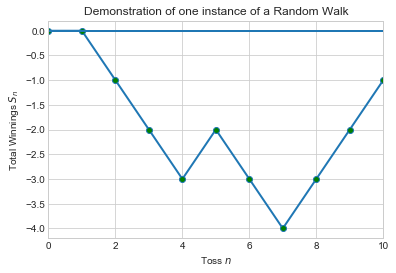

In [109]:
#Importing the needed Libraries from Python
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

# Function to simulate Random Walks
def random_walk_sim(nTrials):

    #Initializing the function variables
    complete_path = [0]
    options = [-1,1]
    winnings = 0
    
    #Implementing the loop to simulate the random walk

    for x in range(nTrials):
            if x == 0:
                winnings = 0
            else:
                toss = rand.choice(options)
                winnings = winnings + toss
            complete_path.append(winnings)

    #Graph plot specifications

    plt.plot(complete_path,'o',linestyle='-',markerfacecolor='green',linewidth="2")
    plt.axhline(y=0,color='#1f77b4',linewidth="2")
    plt.style.use('seaborn-whitegrid')
    plt.grid(True)
    plt.xlabel(r"Toss $n$")
    plt.ylabel(r"Total Winnings $S_{n}$")
    plt.title("Demonstration of one instance of a Random Walk")

    axes = plt.gca()
    axes.set_xlim([0,nTrials])
    
plt.show()

#Main Driving code : #Initializing Variables
nTrials = 10
random_walk_sim(nTrials)            

`random_walk_sim(nTrials)` generates a random walk of length $nTrials$. The gains $s_n$ vary between the values in the set $\{4,2,0,-2,-4\}$.

`random_walk_multiple_sim(nTrials,nSims)` generates $nSims$ random paths.

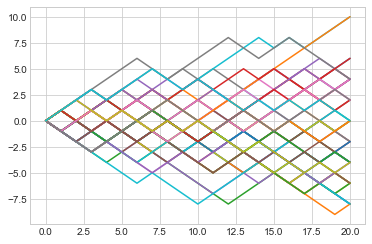

In [93]:
# Simulating the random walk for n Tossings looping within m simulations - Corresponding to point 5
def random_walk_multiple_sim(nSims,nTrials):
    complete_path = []
    options = [-1,1]
    winnings = 0

    for i in range(nSims):
        complete_path = [0]
        winnings = 0
        for x in range(nTrials):
            toss = rand.choice(options)
            winnings = winnings + toss
            complete_path.append(winnings)

        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.plot(complete_path)
plt.show()

#Main Driving code : #Initializing Variables


nSims = 50
nTrials = 20
random_walk_multiple_sim(nSims,nTrials)

Next, we study the Ballot Problem, which provides great insights about gain fluctuations.

## The Ballot Problem

_Suppose that, in a ballot, candidate $P$ scores $p$ votes and candidate $Q$ scores $q$ votes, where $p \gt q$. The probability that throughout the counting there are always more votes for P than Q equals_ $(p-q)/(p+q)$.

In mathematical language we are here concerned with arrangements of $x=p+q$ symbols $\epsilon_1,\epsilon_2,\ldots,\epsilon_x$ consisting of $p$ plus ones and $q$ minus ones. The partial sum $s_k$ is the number of votes by which P leads or trails, just after the kth vote is cast. Clearly $s_x = p - q$ and 

$$
s_i - s_{i-1} = \epsilon_i= \pm1 \hspace{1cm} (1.1)
$$

where $s_0 = 0$, $i = 0,1,2,\ldots,x$ 

Conversely, every arrangement ${s_1,s_2,....s_x}$ of integers satisfying (1.1) represents a potential voting record. We wll use a geometrical terminology and represent such an arrangement by a polynomial line whose $ith$ side has slope $\epsilon_i$ and whose $i$th vertex has ordinate $s_i$. _Such lines will be called paths._

__Definition.__ _Let $x>0 $ and $y$ be integers. A path ${s_1,s_2,...s_x}$ from the origin to the point $(x,y)$ is a polygonial line whose vertices have abscissas $0,1,2...,x$ and ordinates $ s_0,s_1,s_2,...,s_x$ satisfying $(1.1)$ with $s_x = y$_

If $p$ among the $\epsilon_i$ are positive and $q$ negative, then 

$$
x = p+q, \hspace{0.5cm} y=p-q \hspace{1cm} (1.2)
$$


An arbitrary point $(x,y)$ can be joined to the origin by a path only if $x$ and $y$ are of the form (1.2). In this case the $p$ places for the positive $epsilon_i$ can be chosen from the $x = p+ q$ available places in different ways.

$$N_{x,y} = {p+q \choose p} = {p+q \choose q} $$

It is convenient to $N_{x,y} = 0$ whenever $x,y$  are not of the form (1.2). Then _there exists exactly $N_{x,y}$ different paths from the origin to the point $(x,y)$_. Bertrand's ballot theorem asserts that when $y > 0$ there exist exactly $(y/x)N_{x,y}$ satisfying the conditions $s_1 > 0, s_2 > 0,\ldots, s_{x-1} >0, s_x = y$.

The ballot theorem refers to paths situated entirely above the $x$-axis, that is, games in which the lead never changes. This can be pursued further by investigating how often the lead is likely to change for an arbitrary path. We reach conclusions that play havoc with our intuition. It is generally expected that in a prolonged series of coin tossings, Peter should lead about half the time and Paul the other half. This is entirely wrong, however. In $20,000$ tossings, it is about $88$ times more probable that Peter leads in all $20,000$ trials than that each players in $10,000$ trials. In general the lead changes at such infrequent intervals that intuition is defied. This is a sample of the conclusions to be drawn from the first arc sine law.


For $(x,y)=(8,4)$, there are ${8\choose 6} = {8\choose 2} = 28$ paths starting from the origin to this point. This are shown in the figure below.

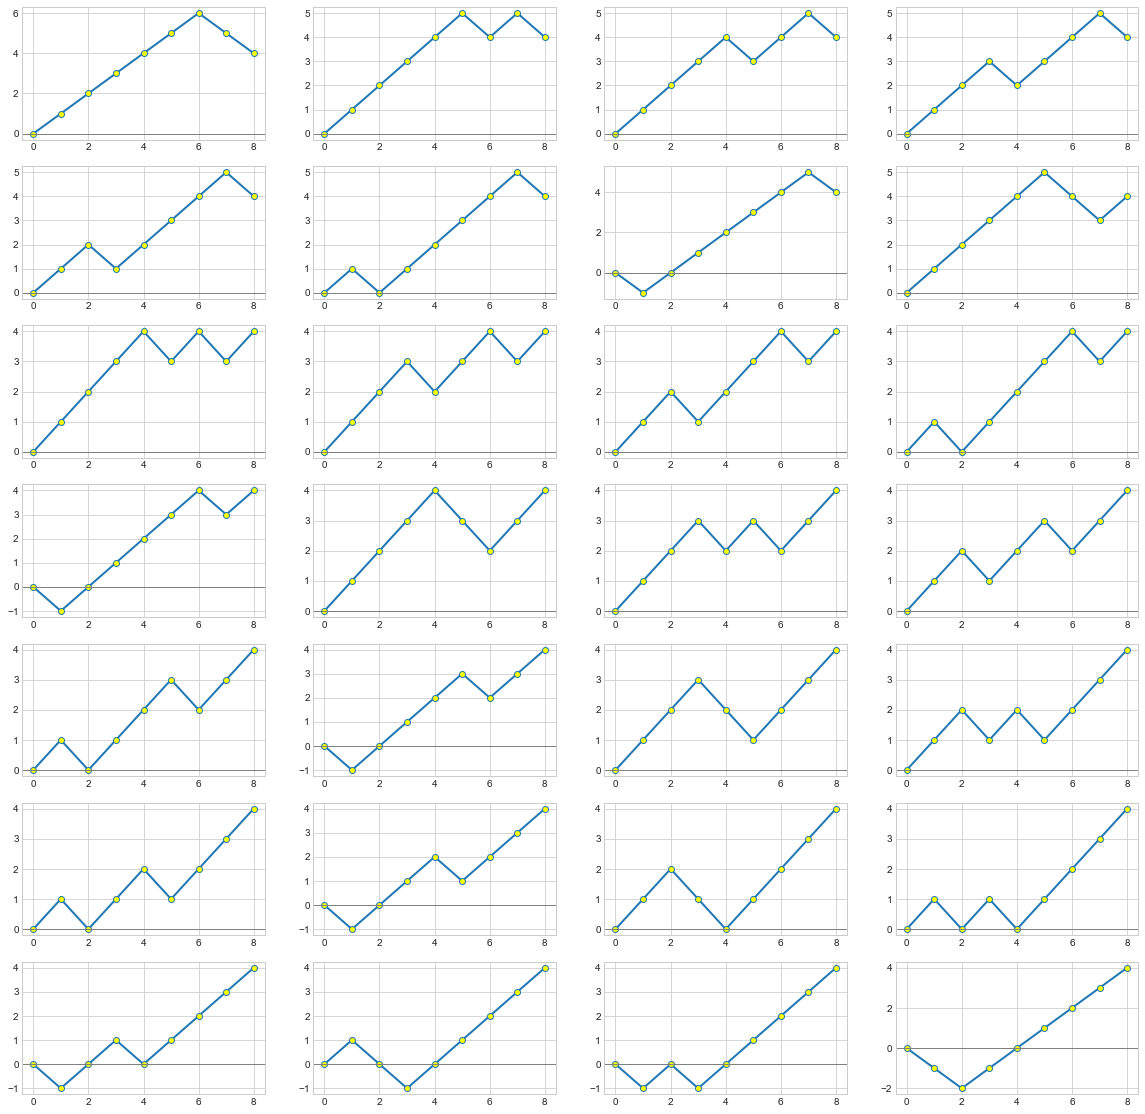

In [168]:
# Program to plot N_x,y paths from the origin to the point (x,y)
import matplotlib.pyplot as plt

fig, axes= plt.subplots(nrows=7, ncols=4, figsize=(20,20))

X = np.zeros(shape=(28,8))
S = np.zeros(shape=(28,8))
path = np.zeros(shape=(28,9))

X[0] = [1,1,1,1,1,1,-1,-1] 
X[1] = [1,1,1,1,1,-1,1,-1]
X[2] = [1,1,1,1,-1,1,1,-1]
X[3] = [1,1,1,-1,1,1,1,-1]
X[4] = [1,1,-1,1,1,1,1,-1]
X[5] = [1,-1,1,1,1,1,1,-1]
X[6] = [-1,1,1,1,1,1,1,-1]
X[7] = [1,1,1,1,1,-1,-1,1]
X[8] = [1,1,1,1,-1,1,-1,1]
X[9] = [1,1,1,-1,1,1,-1,1]
X[10] = [1,1,-1,1,1,1,-1,1]
X[11] = [1,-1,1,1,1,1,-1,1]
X[12] = [-1,1,1,1,1,1,-1,1]
X[13] = [1,1,1,1,-1,-1,1,1]
X[14] = [1,1,1,-1,1,-1,1,1]
X[15] = [1,1,-1,1,1,-1,1,1]
X[16] = [1,-1,1,1,1,-1,1,1]
X[17] = [-1,1,1,1,1,-1,1,1]
X[18] = [1,1,1,-1,-1,1,1,1]
X[19] = [1,1,-1,1,-1,1,1,1]
X[20] = [1,-1,1,1,-1,1,1,1]
X[21] = [-1,1,1,1,-1,1,1,1]
X[22] = [1,1,-1,-1,1,1,1,1]
X[23] = [1,-1,1,-1,1,1,1,1]
X[24]= [-1,1,1,-1,1,1,1,1]
X[25] = [1,-1,-1,1,1,1,1,1]
X[26]= [-1,1,-1,1,1,1,1,1]
X[27] = [-1,-1,1,1,1,1,1,1]

for i in range(28):
    S[i] = np.cumsum(X[i])
    path[i] = np.insert(S[i],0,0)
    #print(path[i])

t = [0,1,2,3,4,5,6,7,8]

for i in range(7):
    for j in range(4):
        axes[i,j].plot(t,path[4*i+j],'o',linestyle='-',
                       markerfacecolor='yellow',linewidth="2")
        axes[i,j].axhline(y=0,color='grey',linewidth="1")

## The Reflection Principle

Let A = (a,$\alpha$) and B = (b,$\beta$) be integral points in the xy-plane.

<img src="Reflection_principle.jpg">

By reflection of A on the x-axis is meant the point $A'$ = (a,-$\alpha$). Consider a path from $A$ to $B$.

__Lemma__ _(Reflection Principle.) The number of paths from $A$ to $B$ which touch or cross the x-axis equals the number of all paths from $A'$ to $B$._

_Proof_: Consider a path $\{s_a=\alpha,s_{a+1},\ldots,s_b =\beta\}$ from $A$ to $B$ having one or more vertices on the x-axis. Let $t$ be the abscissa of the _first_ such vertex; that is, choose t so that $s_a >0,\ldots,s_{t-1}>0,s_t=0$. Then $\{-s_a,-s_{a+1},\ldots,-s_{t-1},s_t = 0,s_{t+1},s_{t+2},\ldots,s_b\}$ is a path leading from $A'$ to $B$ having $T =(t,0)$ as its first vertex on the x-axis. The sections $AT$ and $A'T$ are exact mirror images, reflections of each other. Therefore, there exists a one-to-one correspondence between all paths from $A'$ to $B$ and such  paths from $A$ to $B$ as have a vertex on the x-axis. The lemma is proved.

__Theorem 1.__ _(Ballot Theorem.)_ Let $x>0,y>0$. The number of paths $\{s_1,s_2,\ldots,s_x =y\}$ from the origin to $(x,y)$ such that $s_1 > 0, s_2 >0,\ldots,s_x >0$ equals $(y/x)N_{x,y}$. The probabilty of each path is its slope $y/x=(p-q)/(p+q)$.

$\textit {Proof.}$ Since $s_1 = \pm1$, we have $s_1 = 1$ for each admissible path. It follows that there exists as many admissible paths as there are paths leading from the point $(1,1)$ to $(x,y)$ which neither touch nor cross the $x$-axis. By the reflection principle the number of such paths equals : 

$$\begin{align}
\text{Number of admissible paths} &= \text{Number of paths from } (1,1) \text{ to } (x,y) \text{ which neither touch or cross x-axis} \\
                                  &= \text{All paths from } (1,1)  \text{ to } (x,y) - \text{Paths from }(1,1) \text{ to } (x,y) \text{ that touch or cross x-axis}\\
                                  &= \text{All paths from } (1,1)  \text{ to } (x,y) - \text{ All Paths from }(1,-1) \text{ to } (x,y)\\
                                  &= N_{x-1,y-1} - N_{x-1,y+1}
\end{align}$$

Now, 

$ N_{x,y} = {p+q \choose p} = {p+q  \choose q} = {x \choose (x+y)/2} = {x \choose (x-y)/2}$


$\begin{aligned} 
N_{x-1,y-1} - N_{x-1,y+1} &= {x-1 \choose (x-1+y-1)/2}- {x-1 \choose (x-1+y+1)/2}\\
                          &= {x-1 \choose (x+y-2)/2}- {x-1 \choose (x+y)/2}\\
                          &= {p+q-1 \choose p-1}- {p+q-1 \choose p} \\
                          &= {p+q-1 \choose p-1}- {p+q-1 \choose q-1} \\
                          &= \frac{(p+q-1)!}{(p+q-1-p+1) (p-1)!} - \frac{(p+q-1)!}{(p+q-1-q+1)!(q-1)!}\\
                          &= \frac{p(p+q-1)!}{(p+q-1-p+1) p!} - \frac{q(p+q-1)!}{p!q!}\\
                          &= \frac{(p-q)(p+q-1)!}{q! p!}\\
                          &= \frac{(p-q)}{(p+q)}\times\frac{(p+q)!}{p!q!}\\
                          &= \frac{y}{x} N_{x,y}
\end{aligned}$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

#Initializing variables
nSim =100000
nTrials =100
s_i = 0
complete_path = []
options = [-1,1]
nPathsAboveZero = np.zeros(nTrials)
allLeads = []

#Loop

for i in range(nSim):
    complete_path = [0]
    s_i = 0
    for x in range(nTrials):
        epsilon_i = rand.choice(options)
        s_i = s_i + epsilon_i
        complete_path.append(s_i)
    
    allLeads.append(s_i)
    
    if (np.array(complete_path[1:]) > 0).all():
        nPathsAboveZero[s_i] = nPathsAboveZero[s_i] + 1


In [18]:
b = np.array(allLeads) > 0
allLeads = np.array(allLeads)[b]

y, freq = np.unique(allLeads, return_counts=True)

for i in range(len(y)):
    print ("Numerical probability of a lead throughout when (p-q) ", y[i], " is = ", nPathsAboveZero[y[i]]/freq[i])

Numerical probability of a lead throughout when (p-q)  2  is =  0.018642324505
Numerical probability of a lead throughout when (p-q)  4  is =  0.0401095140315
Numerical probability of a lead throughout when (p-q)  6  is =  0.0614074406096
Numerical probability of a lead throughout when (p-q)  8  is =  0.0738968633705
Numerical probability of a lead throughout when (p-q)  10  is =  0.10408765276
Numerical probability of a lead throughout when (p-q)  12  is =  0.125595387315
Numerical probability of a lead throughout when (p-q)  14  is =  0.147117962466
Numerical probability of a lead throughout when (p-q)  16  is =  0.166144200627
Numerical probability of a lead throughout when (p-q)  18  is =  0.179987797437
Numerical probability of a lead throughout when (p-q)  20  is =  0.188868613139
Numerical probability of a lead throughout when (p-q)  22  is =  0.211920529801
Numerical probability of a lead throughout when (p-q)  24  is =  0.251764705882
Numerical probability of a lead throughout

The probability that a path from $(0,0)$ to $(x,y)$ lies entirely above the $X$-axis must be its slope, so $p_{2,100}=0.02,p_{4,100}=0.04,p_{6,100}=0.06,\ldots$. The probabilities from the numerical simulation are close to the theoretical answer.

We turn our attention to studying the paths joining origin to a point $N =(2n,0)$ of the x-axis. Define

$$L_{2n} = \frac{1}{n+1}{2n\choose n}$$

__Theorem 2.__ _Among the ${2n \choose n}$ paths joining the origin to the point $(2n,0)$ of the $x$-axis there are_

_(a) exactly $L_{2n-2}$ paths with inner vertices above the $x-axis$, that is :_

$$s_1 > 0, s_2 >0, \ldots, s_{2n-1} > 0, (s_{2n}=0) \hspace{1cm}(2.1)$$

_(n) exactly $L_{2n}$ paths with no vertex below the $x-axis$, that is :_

$$s_1 \geq 0, s_2 \geq 0, \ldots, s_{2n-1} \geq 0, (s_{2n}=0) \hspace{1cm}(2.2)$$

_There are as many paths to 2n with all inner vertices above the x-axis as there are paths to 2n-2 with no vertex below the $x$-axis_.

_Proof._

Each path satisfying condition (2.1) passes through the point $N_1 = (2n-1,1)$ and by the ballot theorem the number of paths to $N_1$ such that $s_1 >0,\ldots,s_{2n-2}>0$  equals: 

$$\begin{align}N_{2n-1,1}&=\frac{1}{2n-1}{{2n-1} \choose n} = \frac{1}{2n-1}{{2n-1} \choose {n-1}}\\
                         &= \frac {1}{2n-1}\cdot\frac{(2n-1)!}{n!(n-1)!}\\
                         &= \frac {1}{2n-1}\cdot\frac{(2n-1)(2n-2)!}{n(n-1)!(n-1)!}\\
                         &= \frac {1}{n}\cdot\frac{(2n-2)!}{(n-1)!(n-1)!}\\
                         &= \frac {1}{n}\cdot{{2n-2} \choose {n-1}}\\
                         &= L_{2n-2}
\end{align}$$

This proves (2.1). 

Again, let a path satisfy condition (2.1). Omitting the first and the last side we get a path that joins $O_1 = (1,1)$ to $N_1 = (2n-1,1)$ and at the same time such that all its vertices lie on or above the line $y=1$. Translating the origin to $O_1$, we get a path from the new origin to the point $N_1$ which has the new coordinates $(2n-2,0)$, none of whose vertices lies below the new x-axis. Since, we began with a path satisfying (2.1), the number of paths from $(0,0)$ to $(2n-2,0)$, none of whose vertices are below the X-axis are equal to $L_{2n-2}$. Hence, the paths from $(0,0)$ to $(2n,0)$, none of whose vertices are below the X-axis is $L_{2n}$. This proves (2.2).


## Random walks and coin tossing

We imagine a coin tossings performed at a uniform rate, so that the nth tiral occurs at time $n$. Peter may mark his cumulative gain at all times by an indicator which we shall call "particle". This particle, then, moves onavertical axis starting from the origin. It moves at times $ 1,2,\ldots $ one unit step upward if the coin lands heads, one step downward if the coin lands tails. We say that the particle performs a __symmetric random walk__. This is a physicist's model of diffusion.

At time $n$ the position of the particle is the point $s_n$ of the vertical axis. The path $\{s_1,s_2,\ldots,s_n\}$ represents the space-time diagram of the random walk, the x-axis playing the role of the time axis. 

__Terminology.__ _We shall say that at time $n$ there takes place:_

_A return to the origin if _

$$s_n = 0 \hspace{1cm} (3.1)$$

_A first return to the origin if_

$$s_{1} \neq 0, s_{2} \neq 0, \ldots, s_{n-1} \neq 0, s_n = 0 \hspace{1cm} (3.2)$$

_A first passage through $r > 0$ if_

$$s_1 < r,  s_2 < r,\ldots, s_{n-1} < r , s_n = r \hspace{1cm} (3.3)$$

A second, third, $\ldots$ return to the origin and a first passage through $ r < 0$ are defined in an obvious way. Not that passages through the origin can take place only at _even times_, and we shall frequently restrict the formulas to even times. In betting language, a return to the origin represents an _equalization of the accumulated numbers of heads and tails._


## Reformulation of the combinatorial theorems

Define 

$$u_2n=\frac{1}{2^{2n}}{2n \choose n} \hspace{1cm} (4.1)$$ 

$$f_{0}=0, \hspace{1cm} f_{2n}=\frac{1}{2n}u_{2n-2} \hspace{1cm} (4.2)$$

We can prove the following relation using algebra.

$\begin{align}
u_{2n-2}-u_{2n} &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}} - \frac{1}{2^n}{2n \choose n} \\
                &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}} - \frac{1}{2^{2}2^{2n-2}}\frac{(2n)!}{n!n!}\\
                &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}} - \frac{1}{2^{2}2^{2n-2}}\frac{(2n)(2n-1)(2n-2)!}{n(n-1)!n(n-1)!}\\
                &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}} - \frac{1}{2^{2n-2}}\frac{(2n)(2n-1)}{4n^2}\frac{(2n-2)!}{(n-1)!(n-1)!}\\
                &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}} - \frac{1}{2^{2n-2}}\frac{(2n-1)}{2n}{{2n-2} \choose {n-1}}\\
                &= \frac{1}{2^{2n-2}}{{2n-2} \choose {n-1}}\left(1-\frac{2n-1}{2n}\right)\\
                &= \frac{1}{2n}u_{2n-2}\\
                &= f_{2n}
\end{align}$

Hence, 

$$f_{2n}=u_{2n-2}-u_{2n} \hspace{1cm} (4.3)$$

__Theorem 1__: For each $ n \geq 1$:

$\begin{align}
u_{2n} &= P\{s_{2n} = 0\} & (4.4)\\ 
u_{2n} &= P\{s_1 \neq 0, s_2 \neq 0,\ldots,s_{2n}\neq 0\} & (4.5)\\
u_{2n} &= P\{s_1 \geq 0, s_2 \geq 0,\ldots,s_{2n}\geq 0\} & (4.6)
\end{align}$

_In words: the three events, (a) a return to the origin takes place at time $2n$, (b) no return occurs up to and including time $2n$ and (c) the path is non-negative between $0$ and $2n$, have the common probability $u_{2n}$_

_Furthermore, we prove_

$\begin{align}
f_{2n} &= P\{s_1 \neq 0,  s_2 \neq 0,\ldots,s_{2n-1}\neq 0,s_{2n} = 0 \} & (4.7)\\
f_{2n} &= P\{s_1 \geq 0,  s_2 \geq 0,\ldots,s_{2n-2}\geq 0,s_{2n-1} < 0 \} & (4.8)
\end{align}$

_that is: the two events (a) the first return to the origin takes place at time $2n$ and (b) the first passage through $-1$ occurs at time $2n-1$ have the common probability $f_{2n}$_.

_Proof._ Consider the sample space of paths of fixed length $2n$. There exist ${2n \choose n}$ paths joining the origin to the point $(2n,0)$. The probability of each path being realized is $\frac{1}{2^{2n}}$. Thus, $P\{s_{2n}=0\}=\frac{1}{2^{2n}}{{2n} \choose n}=u_{2n}$. This proves (4.4).

There exist $L_{2n-2}$ paths from $(0,0)$ to $(2n,0)$, with all its inner vertices above the X-axis, that is $s_{1}>0, s_{2}>0, \ldots,s_{2n-1}>0, (s_{2n}=0)$. There should be twice as many paths satisfying the condition in (4.7), since an equal number lie above the X-axis and an equal number below the X-axis. So, the number of paths satisfying (4.7) is $2L_{2n-2}$. The probability of each path is $\frac{1}{2^2n}$. Therefore,

$\begin{align}
P\{s_1 \neq 0,  s_2 \neq 0,\ldots,s_{2n-1}\neq 0,s_{2n} = 0 \} &= 2L_{2n-2}\cdot\frac{1}{2^{2n}}\\
                                                               &= 2\frac{1}{n-1+1}{2n-2 \choose n-1}\frac{1}{2^{2n}}\\
                                                               &= \frac{1}{2n}{2n-2 \choose n-1}\frac{1}{2^{2n-2}}\\
                                                               &= \frac{1}{2n}u_{2n-2}\\
                                                               &= f_{2n}
\end{align}$

This proves (4.7).

Moreover, a path that satisfies (4.8) must be non-negative and return to the origin at $t=2n-2$. The number of non-negative paths from $(0,0)$ to $(2n-2,0)$ are also $L_{2n-2}$. Further, there are two paths from (2n-2,0) that pass through (2n-1,-1) of length $2$. Therefore, by the expression derived above,  

$\begin{align}
P\{s_1 \geq 0,  s_2 \geq 0,\ldots,s_{2n-2}\geq 0,s_{2n-1} < 0 \} &= 2L_{2n-2}\cdot\frac{1}{2^{2n}}\\
                                                                 &= f_{2n}
\end{align}$

This proves (4.8).

The probability that no zero occurs up to and including time $2n$ equals one minus the probability of a first return to the origin at a time $\leq{2n}$.

Using (4.7), this difference is 

$\begin{align}
P\{s_1 \neq 0, s_2 \neq 0, \ldots, s_{2n} \neq 0\} &= 1-f_{2}-f_{4}-\ldots-f_{2n} \hspace{1cm} (4.9)\\
                                                 &= 1-(1-u_{2}) - (u_{2}-u_{4})-(u_{4}-u_{6}) - \ldots - (u_{2n-2}-u_{2n}) \hspace{1cm} \text{using the identity in (4.3)}\\
                                                 &= u_{2n}
\end{align}$

This proves (4.5).

Lastly, the right side in (4.6) equals one minus the probability of a passage through -1 before time $2n$, and using (4.8) this difference is given by (4.9). This proves (4.6).

In [37]:
# Simulation of the theorem X.1,X.2 and X.3 
import numpy as np
import matplotlib.pyplot as plt
import random as rand


#Initializing variables
nSim = 10000
nTrials = 10
winnings = 0
complete_path = []
options = [-1,1]
count1 = 0
count2 = 0
count3 = 0
count4 =0
count5 = 0

for i in range(nSim):
    complete_path = [0]
    winnings = 0
    for x in range(nTrials):
        toss = rand.choice(options)
        winnings = winnings + toss
        complete_path.append(winnings)
            
    if complete_path[-1] == 0:
        count1 =count1+1   
        
    if (np.array(complete_path[1:]) != 0).all():
        count2 = count2+1
        
    if (np.array(complete_path[1:]) >= 0).all():
        count3 = count3+1      
    
    if ((np.array(complete_path[1:nTrials-1]) != 0).all()) and (complete_path[nTrials] == 0):
        count4 = count4+1
        
    if ((np.array(complete_path[1:nTrials-2]) >= 0).all()) and (complete_path[nTrials-1] < 0):
        count5 = count5+1
print ("Numerical probability of return to origin at t = 2n =",count1/nSim)
print ("Numerical probability of no return upto and including time 2n =",count2/nSim)
print ("Numerical probability of non-negative path between 0 and 2n =",count3/nSim)
print ("Numerical probability of first return to 0 at time 2n =",count4/nSim)
print ("Numerical probability of first passage through -1 at time 2n-1 ",count5/nSim)

Numerical probability of return to origin at t = 2n = 0.2532
Numerical probability of no return upto and including time 2n = 0.2435
Numerical probability of non-negative path between 0 and 2n = 0.2459
Numerical probability of first return to 0 at time 2n = 0.0295
Numerical probability of first passage through -1 at time 2n-1  0.0267


In [38]:
import math

#Theoretical probabilities u_2n and f_2n
def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

def u2n(n):
    return 1/(2 ** (2*n)) * nCr(2*n,n)

def f2n(n):
    return 1/(2*n)*u2n(n-1)

print(u2n(5))
print(f2n(5))

0.24609375
0.02734375


__Corollary.__ It follows that for ${n}\geq {1}$

$$u_{2n}=\sum_{r=1}^{n}f_{2r}u_{2n-2r} \hspace{1cm} (4.10)$$

_Proof._
If a return to origin takes place at time $2n$, then the first return must take place at some time $2r \leq 2n$. We have just seen that the number of paths from the origin to $(2n,0)$ with the first return to the origin taking place at some time $2r\leq{2n}$ equals $2^{2r}f_{2r}\cdot 2^{2n-2r}u_{2n-2r}$. Summing over $r$, we get the equation (4.10).

## Probability of long leads and the first arc-sine law

We shall say that the particle spends the time from $k-1$ to $k$ on the positive side if the $k$-th side of its path lies above the $x$- axis, that is, if atleast one of the two vertices $s_{k-1}$ and $s_{k}$ is positive. In betting terminology, this means that at both the $(k-1)$st and the $k$th trial Peter's accumulated gains were non-negative.

The paradoxical property of the paths mentioned in the beginning will be derived from the following.

__Theorem 1__. Let $p_{2k,2n}$ be the probability that in the time interval from $0$ to $2n$ the particle spends $2k$ time units on the positive side and $(2n-2k)$ time units on the negative side. Then,

$$p_{2k,2n}=u_{2k}u_{2n-2k} \hspace{1cm} (5.1)$$

_Proof_. The probability that the particle keeps to the positive side during the entire time interval from $0$ to $2n$ is given by the formula (4.6) and we see that $p_{2n,2n}=u_{2n}$ as asserted. For reasons of symmetry, we also have $p_{0,2n}=u_{2n}$ and it remains only to prove (5.1) for $1 \leq k \leq {n-1}$.

A particle that keeps for $2k>0$ time units to the positive side and for $2n-2k$ time units to the negative side necessarily passes through zero. Let $2r$ be the moment of its _first_ return to zero. Then, the path belongs to one of the following two classes. 

In the first class, upto time $2r$ the particle stays on the positive side and during the time interval from $2r$ to $2n$, it spends exactly $2k-2r>0$ time units on the positive side. There exist $2^{2r}f_{2r}$ paths of length $2r$ which return to the origin for the first time at $2r$ and half of them keep to the positive side. Furthermore, by definition, there are $2^{2n-2r}p_{2k-2r,2n-2r}$ paths of length $(2n-2r)$ starting at $(2r,0)$ and having exactly $(2k-2r)$ sides above the x-axis. Thus, the total number of paths of length $2n$ in the first class equals :

$$\frac{1}{2}\cdot 2^{2r}f_{2r}\cdot 2^{2n-2r}p_{2k-2r,2n-2r}$$

In the second class, from $0$ to $2r$ the particle keeps to the negative side, and between $2r$ and $2n$, it spends $2k$ time units on the positive side. Here, $2k \leq (2n-2r)$ and the argument above shows that the number of paths in this class equals 

$$\frac{1}{2}\cdot 2^{2r}f_{2r}\cdot 2^{2n-2r}p_{2k,2n-2r}$$

It follows that for $1 \leq k \leq (n-1)$,

$\begin{align}p_{2k,2n}&=\frac{1}{2^{n}}\left\{\frac{1}{2}\cdot2^{2n}\sum_{r=1}^{k}f_{2r}p_{2k-2r,2n-2r}+\frac{1}{2}\cdot2^{2n}\sum_{r=1}^{n-k}f_{2r}p_{2k,2n-2r}\right\}\\
&=\frac{1}{2}\sum_{r=1}^{k}f_{2r}p_{2k-2r,2n-2r}+\frac{1}{2}\sum_{r=1}^{n-k}f_{2r}p_{2k,2n-2r} \hspace{1cm} (5.2)
\end{align}$

Suppose now by induction that $p_{2k,2\nu}=u_{2k,2\nu - 2k}$ for $\nu=1,2,\ldots,n-1$. The relation holds for $\nu=1$. Then formula (5.2) reduces to 

$\begin{align}p_{2k,2n}&=\frac{1}{2}\sum_{r=1}^{k}f_{2r}u_{2k-2r}u_{2n-2r-(2k-2r)} + \frac{1}{2}\sum_{r=1}^{n-k}f_{2r}u_{2k}u_{2n-2k-2r}\\
&= \frac{1}{2}u_{2n-2k}\sum_{r=1}^{k}f_{2r}u_{2k-2r}+ \frac{1}{2}u_{2k}\sum_{r=1}^{n-k}f_{2r}u_{2n-2k-2r}\\
&= \frac{1}{2}u_{2n-2k}u_{2k}+\frac{1}{2}u_{2k}u_{2n-2k} \hspace{1cm} \text{using the identity (4.10)}\\
&= u_{2k}u_{2n-2k} \hspace{1cm} (5.3)
\end{align}$

Although formula (5.1) is exact, it is not very revealing and it preferable to replace it by a simpler approximation.

The Stirling's approximation for $n!$ is given by:

$$n! \approx e^{-n}(n^n)\sqrt{2\pi n} $$

Applying Stirling's approximation to $u_2n$, we get :

$\begin{align}
u_{2n}&=\frac{1}{2^{2n}}{2n \choose n}\\
&=\frac{1}{2^{2n}}\frac{(2n)!}{n!n!}\\
&=\frac{1}{2^2n}\frac{e^{-2n}\sqrt{4\pi {n}}{(2n)}^{(2n)}}{e^{-n}\sqrt{2\pi {n}}{(n)}^{(n)}\cdot e^{-n}\sqrt{2\pi {n}}{(n)}^{(n)}}\\
&=\frac{1}{2^{2n}}\frac{e^{-2n}\sqrt{4\pi {n}}{(2)}^{(2n)}{(n)}^{(2n)}}{e^{-2n}\sqrt{4\pi {n}}\sqrt{\pi n}{(n)}^{2n}}\\
&=\frac{1}{\sqrt{\pi n}}
\end{align}$

Hence, 

$$p_{2k,2n} \approx \frac{1}{\pi \sqrt{k(n-k)}}$$

The probability that the fraction $k/n$ of the time spent on the positive side lies between $1/2$ and $\alpha$ is given by,

$$\sum_{\frac{1}{2}n < k < \alpha n}p_{2k,2n} \approx \frac{1}{n}\sum_{\frac{1}{2}n < k < \alpha n}p_{2k,2n} \left\{\frac{k}{n}\left(1-\frac{k}{n}\right)\right\} \hspace{5cm} (5.5)$$

This sum is given by the Riemann inegral of 

$${\pi}^{-1}\int_{\frac{1}{2}}^{\alpha}\frac{dx}{\sqrt{x(1-x)}}=\frac{2}{\pi}\arcsin \sqrt{\alpha} - \frac{1}{2} \hspace{1cm} (5.6)$$

From symmetry, the probability that $k/n \leq \frac{1}{2}$ approaches $\frac{1}{2}$. Adding this probability to (5.6), we get -

__Theorem__. For a fixed fraction $t (0< t <1)$ the probability that the fraction $k/n$ of the time spent on the positive side is less than $t$ is close to 

$$\frac{1}{\sqrt{\pi}}\int_{0}^{t}\frac{dx}{\sqrt{x(1-x)}}=\frac{2}{\sqrt{\pi}}\arcsin {\sqrt{t}}$$

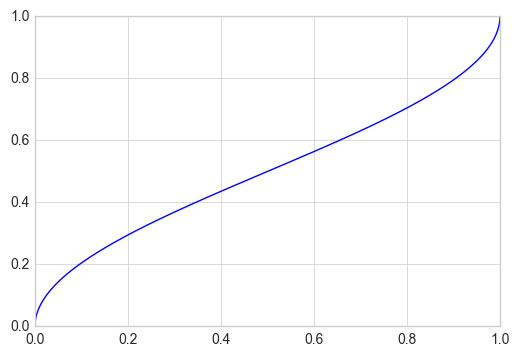

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

y = []
T =np.linspace(0.000,1.000,10000)
for t in T:
    y.append((2/math.pi)*math.asin(math.sqrt(t)))
    
plt.plot(T,y)
plt.show()

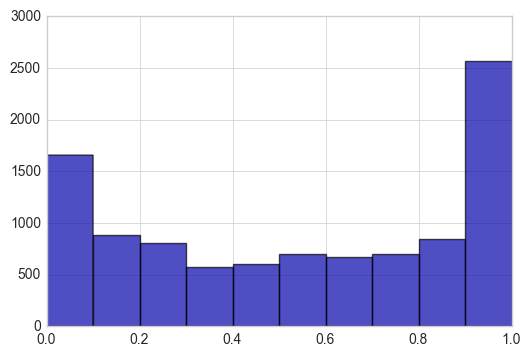

In [51]:
# Simulation of the theorem X.1,X.2 and X.3 
import numpy as np
import matplotlib.pyplot as plt
import random as rand

#Initializing variables
nSim = 10000
nTrials = 100
winnings = 0
complete_path = []
options = [-1,1]
time_spent_on_positive_side = np.zeros(nSim)

for i in range(nSim):
    complete_path = [0]
    winnings = 0
    k = 0
    for x in range(nTrials):
        toss = rand.choice(options)
        winnings = winnings + toss
        complete_path.append(winnings)
        
        if winnings >= 0:
            k = k + 1
    
    time_spent_on_positive_side[i] = (k/nTrials)
    
plt.hist(time_spent_on_positive_side,color='#0504aa',alpha=0.7)
plt.show()